In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys
sys.path.append('../')
import experiments

curves = 6
curve_labels = ['4x Unreg $\\rightarrow$ Unreg', '4x Unreg $\\rightarrow$ Allreg', '4x Unreg $\\rightarrow$ Rand',
                '4x Allreg $\\rightarrow$ Unreg', '4x Allreg $\\rightarrow$ Allreg', '4x Allreg $\\rightarrow$ Rand']
curve_colors = ['blue', 'limegreen', 'red', 'lightblue', 'lightgreen', 'salmon']
curve_styles = ['-', '-', '-', '-', '-', '-']
sizes = 5
size_factors = [0.25, 0.5, 1, 2, 4]
size_idx_map = {0.25: 0, 0.5: 1, 1: 2, 2: 3, 4: 4}
size_labels = ['1/4x', '1/2x', '1x', '2x', '4x']

results_cluster = np.zeros((curves, sizes, 2))
results_proj = np.zeros((curves, sizes, 2))
results_cca = np.zeros((curves, sizes))
results_r = np.zeros((curves, sizes, 2))
# all are indexed [curve][size_factor][mean/std] except cca which has no std dim

large_nets = [86, 91]  # the 4x unregularized and allregularized nets
opt_unreg = experiments.opt[large_nets[0]]
opt_allreg = experiments.opt[large_nets[1]]

'''
1: sq loss not unitized
2: sq loss unitized
3: loss not unitized
4: loss unitized
5: cca
6: violin plots
7: best |r|
'''

# both of these will be indexed [cluster/proj][size][unreg/allreg/random][layer]
with open(opt_unreg.log_dir_base + opt_unreg.name + '/mappability7' + '.pkl', 'rb') as f:
    unreg_results = pickle.load(f)
with open(opt_allreg.log_dir_base + opt_allreg.name + '/mappability7' + '.pkl', 'rb') as f:
    allreg_results = pickle.load(f)

# average across layers
unreg_results = np.mean(unreg_results, axis=3)
allreg_results = np.mean(allreg_results, axis=3)

# rearrange data into easier format
results_cluster[:3, :, 0] = unreg_results[0, :, :].T
results_cluster[3:, :, 0] = allreg_results[0, :, :].T
results_cluster[:3, :, 1] = unreg_results[1, :, :].T
results_cluster[3:, :, 1] = allreg_results[1, :, :].T
results_proj[:3, :, 0] = unreg_results[2, :, :].T
results_proj[3:, :, 0] = allreg_results[2, :, :].T
results_proj[:3, :, 1] = unreg_results[3, :, :].T
results_proj[3:, :, 1] = allreg_results[3, :, :].T
results_cca[:3, :] = unreg_results[4, :, :].T
results_cca[3:, :] = allreg_results[4, :, :].T
results_r[:3, :, 0] = unreg_results[6, :, :].T
results_r[3:, :, 0] = allreg_results[6, :, :].T
results_r[:3, :, 1] = unreg_results[7, :, :].T
results_r[3:, :, 1] = allreg_results[7, :, :].T

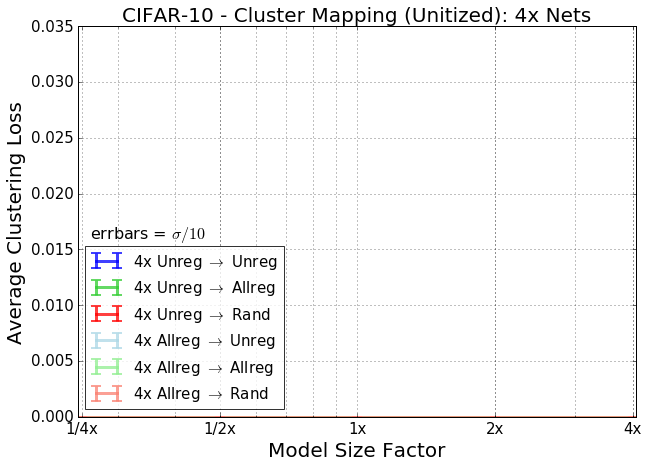

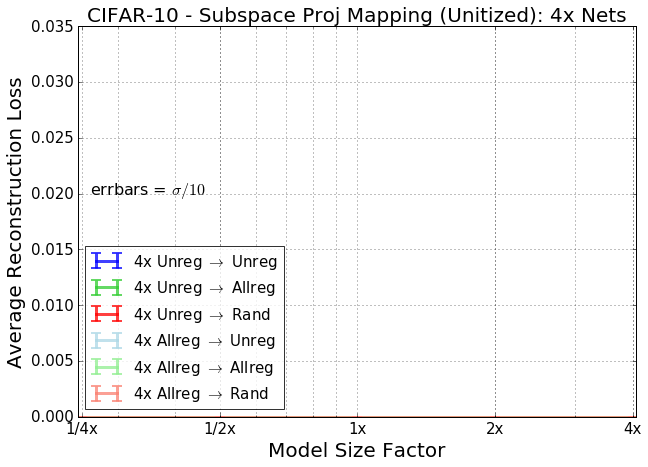

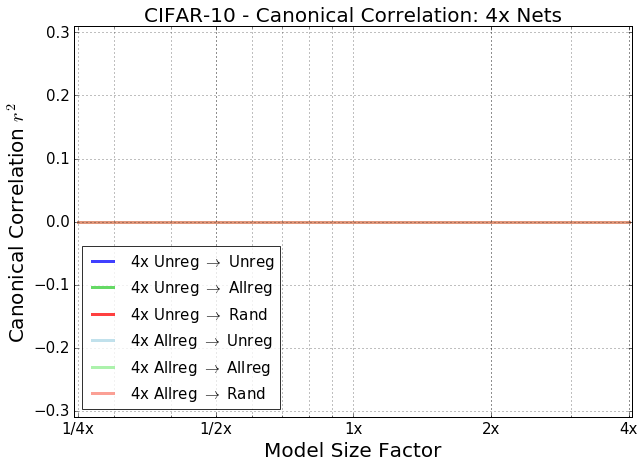

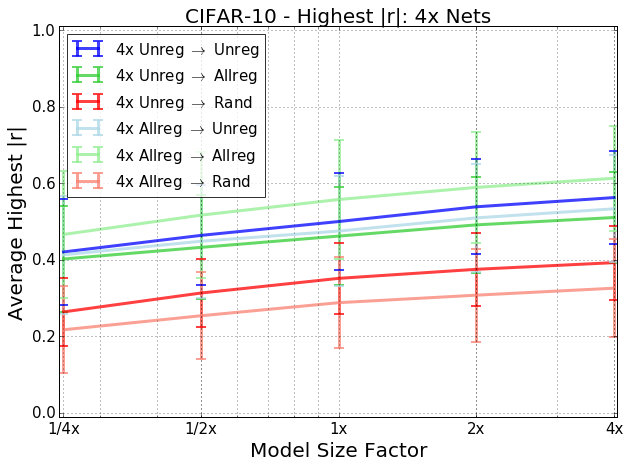

In [3]:
# first plot cluster results

% matplotlib inline
plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - Cluster Mapping (Unitized): 4x Nets', fontsize=20)
plt.xlabel('Model Size Factor', fontsize=20)
plt.ylabel('Average Clustering Loss', fontsize=20)
plt.xlim((0.245, 4.07))
plt.ylim((0, 0.035))
plt.grid(True, which='both', c='black')
plt.xscale('log')
plt.xticks(size_factors, size_labels, fontsize=15)
plt.yticks(fontsize=15)

for curve_idx in range(curves):
    plt.errorbar(size_factors, results_cluster[curve_idx, :, 0], yerr=results_cluster[curve_idx, :, 1]/10, 
                 color=curve_colors[curve_idx], linestyle=curve_styles[curve_idx], linewidth=3, 
                 capsize=5, capthick=2, alpha=0.75)
plt.legend(curve_labels, loc='lower left', framealpha=0.8, fontsize=15)
plt.text(0.26, 0.016, 'errbars = $\sigma/10$', fontsize=16)

plt.show()

# second plot proj results

plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - Subspace Proj Mapping (Unitized): 4x Nets', fontsize=20)
plt.xlabel('Model Size Factor', fontsize=20)
plt.ylabel('Average Reconstruction Loss', fontsize=20)
plt.xlim((0.245, 4.07))
plt.ylim((0.0, 0.035))
plt.grid(True, which='both', c='black')
plt.xscale('log')
plt.xticks(size_factors, size_labels, fontsize=15)
plt.yticks(fontsize=15)

for curve_idx in range(curves):
    plt.errorbar(size_factors, results_proj[curve_idx, :, 0], yerr=results_proj[curve_idx, :, 1]/10, 
                 color=curve_colors[curve_idx], linestyle=curve_styles[curve_idx], linewidth=3, 
                 capsize=5, capthick=2, alpha=0.75)
plt.legend(curve_labels, loc='lower left', framealpha=0.8, fontsize=15)
plt.text(0.26, 0.02, 'errbars = $\sigma/10$', fontsize=16)

plt.show()

# third plot cca results

plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - Canonical Correlation: 4x Nets', fontsize=20)
plt.xlabel('Model Size Factor', fontsize=20)
plt.ylabel('Canonical Correlation $r^2$', fontsize=20)
plt.xlim((0.245, 4.07))
plt.ylim((-0.31, 0.31))
plt.grid(True, which='both', c='black')
plt.xscale('log')
plt.xticks(size_factors, size_labels, fontsize=15)
plt.yticks(fontsize=15)

for curve_idx in range(curves):
    plt.plot(size_factors, results_cca[curve_idx, :], color=curve_colors[curve_idx], 
             linestyle=curve_styles[curve_idx], linewidth=3, alpha=0.75)
plt.legend(curve_labels, loc='lower left', framealpha=0.8, fontsize=15)

plt.show()

# second plot best r results

plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - Highest |r|: 4x Nets', fontsize=20)
plt.xlabel('Model Size Factor', fontsize=20)
plt.ylabel('Average Highest |r|', fontsize=20)
plt.xlim((0.245, 4.07))
plt.ylim((-0.01, 1.01))
plt.grid(True, which='both', c='black')
plt.xscale('log')
plt.xticks(size_factors, size_labels, fontsize=15)
plt.yticks(fontsize=15)

for curve_idx in range(curves):
    plt.errorbar(size_factors, results_r[curve_idx, :, 0], yerr=results_r[curve_idx, :, 1], 
                 color=curve_colors[curve_idx], linestyle=curve_styles[curve_idx], linewidth=3, 
                 capsize=5, capthick=2, alpha=0.75)
plt.legend(curve_labels, loc='upper left', framealpha=0.8, fontsize=15)

plt.show()